In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Data Acquisition

In [2]:
df = pd.read_csv('data.csv')
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


### Exploratory Data Analysis

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
# make the indexes of the column names uniform
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns


Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
# make the string values of rows uniform
strings = list(df.select_dtypes('object'))
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
for col in strings:
    df[strings].apply(lambda x : x.str.lower().str.replace(' ','_'))

In [7]:
df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [8]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [9]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler']
48

model
['1 Series M' '1 Series' '100' '124 Spider' '190-Class']
915

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium unleaded (required)' 'regular unleaded'
 'premium unleaded (recommended)' 'flex-fuel (unleaded/E85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['MANUAL' 'AUTOMATIC' 'AUTOMATED_MANUAL' 'DIRECT_DRIVE' 'UNKNOWN']
5

driven_wheels
['rear wheel drive' 'front wheel drive' 'all wheel drive'
 'four wheel drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['Factory Tuner,Luxury,High-Performance' 'Luxury,Performance'
 'Luxury,High-Performance' 'Luxury' 'Performance']
71

vehicle_size
['Compact' 'Midsize' 'Large']
3

vehicle_style
['Coupe' 'Convertible' 'Sedan' 'Wagon' '4dr Hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

<Axes: xlabel='msrp', ylabel='Count'>

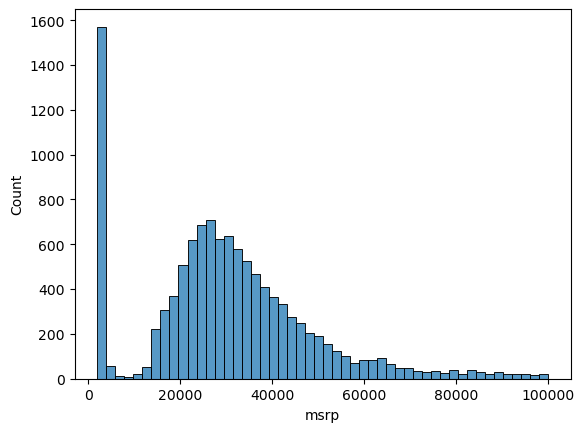

In [10]:
#visualize the MRSP price
sns.histplot(df.msrp[df['msrp'] < 100000] , bins = 50)

In [11]:
#From the graph we can see it is a tail end graph
# Apply Logarithmic function to avoid confusing the ML model(remove the tail-end of graph)
log_price = np.log1p(df['msrp'])
log_price

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

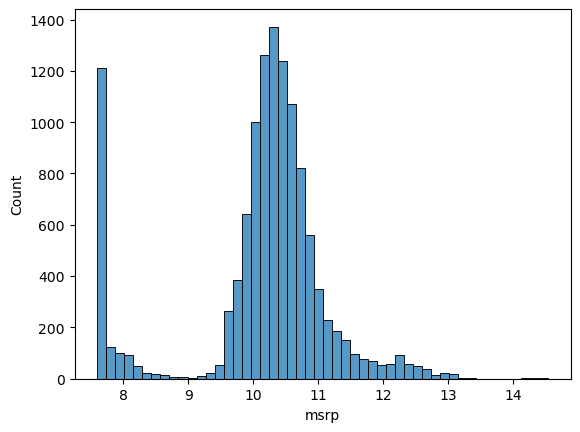

In [12]:
sns.histplot(log_price, bins= 50)

In [13]:
#Now the graph resembels a bell curve

#### Check & clean missing values

In [14]:
df.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

### Setting Up Validation Framework 
###### Train -- Validation -- Test
###### 60% of data for Train 
###### 20% of data for Validation
###### 20% of data for Testing

In [15]:
# size of data
size = len(df)
size

11914

In [16]:
#calculate how much is needed for validation,testing and training
val_size = int(size * 0.2)
test_size = int(size * 0.2)

#since the above values are rounded, we subtract the sum of the val_size and test_size from size of dataset
train_size = size - (val_size + test_size)

val_size , test_size , train_size
#size,val_size + test_size + train_size

(2382, 2382, 7150)

In [17]:
#define validation, test and train datasets
# the dataset has to be shuffled inorder to distribute all features uniformly 
train_df = df.iloc[train_size :]
val_df = df.iloc[train_size: train_size + val_size]
test_df = df.iloc[train_size + val_size: ]

In [18]:
#shuffle the size of the dataset
idx  = np.arange(size)
np.random.shuffle(idx)
idx

array([ 8721, 10091,  2358, ...,  9413,  1493,   288])

In [19]:
# the test, train and validation datasets will be declared through the shuffled dataset
train_df = df.iloc[idx[: train_size ]]
val_df = df.iloc[idx[train_size: train_size + val_size]]
test_df = df.iloc[idx[train_size + val_size: ]]

In [20]:
len(train_df),len(val_df),len(test_df)

(7150, 2382, 2382)

In [21]:
#reset the index
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [22]:
#normalize msrp values
y_train = np.log1p(train_df.msrp.values)
y_val_df = np.log1p(val_df.msrp.values)
y_test_df = np.log1p(test_df.msrp.values)

In [23]:
#remove the msrp values
del(train_df['msrp'])
del(val_df['msrp'])
del(test_df['msrp'])

### Linear Algebra
##### g(Xi)~~ yi -> g is the model, Xi is the feature matrix, and the yi is the  target value 
##### y = Wo + W1X1 + W2X2 +.....+WnXn
##### where y -> the dependent value
#### Wo -> the intercept 
#### W1-Wn -> slope or coefficient


In [24]:
train_df.iloc[10]

make                               Mercedes-Benz
model                                    S-Class
year                                        2017
engine_fuel_type     premium unleaded (required)
engine_hp                                  449.0
engine_cylinders                             8.0
transmission_type                      AUTOMATIC
driven_wheels                   rear wheel drive
number_of_doors                              2.0
market_category          Luxury,High-Performance
vehicle_size                               Large
vehicle_style                        Convertible
highway_mpg                                   25
city_mpg                                      17
popularity                                   617
Name: 10, dtype: object

In [25]:
xi = [325,18, 5657]

In [26]:
w0 = 7.17
w = [0.01, 0.04, 0.02]

In [27]:
def linear_regression(xi):
    pred = w0
    for j in range(len(xi)):
        pred = pred + w[j] * xi[j]
        return pred

In [28]:
linear_regression(xi)

10.42

In [29]:
#since we normalized the msrp using log1p, we have to return the exponent value - 1
np.expm1(10.42)

33522.43414584466

### Linear Regression Vector Form 

In [30]:
def dot(xi, w):
    
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
        return res

In [31]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [32]:
linear_regression(xi)

10.42

#### To make the last equation more simple, we can imagine there is one more feature xi0, that is always equal to 1.
####  g(xi) = w0 + xiTw -> g(xi) = w0 . xi0 + xi^T. w
#### That means vector w becomes a n+1 dimensional vector:
#### w = [w0, w1, w2, … wn]
#### xi = [xi0, xi1, xi2, …, xin] = [1, xi1, xi2, …, xin]
#### wTxi = xiTw = w0 + …

In [33]:
#applying the the formula on feature matrix
w0 = [w0]
w_new = w0 + w
w_new

[7.17, 0.01, 0.04, 0.02]

In [34]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

#create a list of lists X
X = [x1, x2, x10]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

In [35]:
#create a numpy array out of X
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [36]:
#try on the model
def linear_regression(X):
    return X.dot(w_new)
 
y = linear_regression(X)
np.expm1(y) 

array([1.59781730e+16, 5.78757308e+21, 1.04549294e+06])

### Train LInear Regression Model
##### GRAM matrix => X^T * X
##### w = (X^T*X)^-1 * X^T*y


In [37]:
# 
X = [
    [148,24,1385],
    [132,25,2031],
    [453,11,86],
    [158,24,1385],
    [172,25,201],
    [413,11,86],
    [38,54,435],
    [142,25,431],
    [453,31,86]
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24, 1385],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  435],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [38]:
#define an aribitary array y
y = [100, 200, 150, 200, 250,200, 100, 150, 100]

In [39]:
#define the bias term -> since we assumed the values to be all 1's
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
#add the ones array to X array using np.column_stack()
X = np.column_stack([ones, X])


In [41]:
#first declare the GRAM matrix
gram_matrix = X.T.dot(X)
gram_matrix

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 6.126000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 9.176400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.611030e+05],
       [6.126000e+03, 9.176400e+05, 1.611030e+05, 8.398986e+06]])

In [42]:
# declare the inverse of the gram_matrix
gram_matrix_inv= np.linalg.inv(gram_matrix)
gram_matrix_inv

array([[ 4.19061567e+00, -6.97921826e-03, -7.06098585e-02,
        -9.39618391e-04],
       [-6.97921826e-03,  1.39881419e-05,  1.02138324e-04,
         1.60302948e-06],
       [-7.06098585e-02,  1.02138324e-04,  1.53735166e-03,
         1.08534313e-05],
       [-9.39618391e-04,  1.60302948e-06,  1.08534313e-05,
         4.21072015e-07]])

In [43]:
#the product of the gram matrix with its inverse should be an Identity matrix
gram_matrix.dot(gram_matrix_inv).round(1)

array([[ 1.,  0., -0., -0.],
       [ 0.,  1.,  0., -0.],
       [ 0.,  0.,  1., -0.],
       [-0.,  0., -0.,  1.]])

In [44]:
#calculate the weights w
w_full = gram_matrix_inv.dot(X.T).dot(y)
w_full

array([ 3.29287144e+02, -2.47314169e-01, -3.81623868e+00, -1.86522719e-02])

In [45]:
# Now we can find the two estimated coefficients W0 and W

#the first element is the intercept or bias term
W0 = w_full[0]

#the rest is the slope
W = w_full[1:]

In [46]:
W0

329.28714424414034

In [47]:
W

array([-0.24731417, -3.81623868, -0.01865227])

In [48]:
#define the above steps as a function
def train_linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [49]:
train_linear_regression(X, y)

(2.2026114150969393e+19,
 array([-1.54958947e+19,  1.28727321e+00,  7.44355702e-16, -1.20000738e-02]))

### Car Price Baseline Model

In [50]:
#get all the numerical values from the training dataset
train_df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [51]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg','city_mpg', 'popularity']


In [52]:
train_df[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,160.0,6.0,22,16,1385
1,140.0,4.0,32,23,210
2,140.0,4.0,33,23,1385
3,170.0,4.0,27,19,870
4,208.0,4.0,31,23,190
...,...,...,...,...,...
7145,98.0,4.0,44,41,2202
7146,134.0,6.0,23,19,617
7147,190.0,6.0,17,12,1385
7148,285.0,8.0,17,11,549


In [53]:
#extract the values for training
X_train = train_df[base].values
X_train

array([[ 160.,    6.,   22.,   16., 1385.],
       [ 140.,    4.,   32.,   23.,  210.],
       [ 140.,    4.,   33.,   23., 1385.],
       ...,
       [ 190.,    6.,   17.,   12., 1385.],
       [ 285.,    8.,   17.,   11.,  549.],
       [ 170.,    4.,   32.,   24.,  873.]])

In [54]:
#we've already declared the y_train
y_train

array([ 7.60140233,  9.62944537,  9.57748037, ...,  9.99062809,
       10.28247178, 10.22106818])

In [55]:
#before training the model, check for null values
train_df[base].isna().sum()

engine_hp           40
engine_cylinders    22
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [56]:
#fill the null with 0
X_train = train_df[base].fillna(0).values


In [57]:
X_train

array([[ 160.,    6.,   22.,   16., 1385.],
       [ 140.,    4.,   32.,   23.,  210.],
       [ 140.,    4.,   33.,   23., 1385.],
       ...,
       [ 190.,    6.,   17.,   12., 1385.],
       [ 285.,    8.,   17.,   11.,  549.],
       [ 170.,    4.,   32.,   24.,  873.]])

In [58]:
#train the linear_regression model
W0, W = train_linear_regression(X_train, y_train)

In [59]:
#calculate the y_prediction value
y_prediction = W0 + X_train.dot(W)

<Axes: ylabel='Count'>

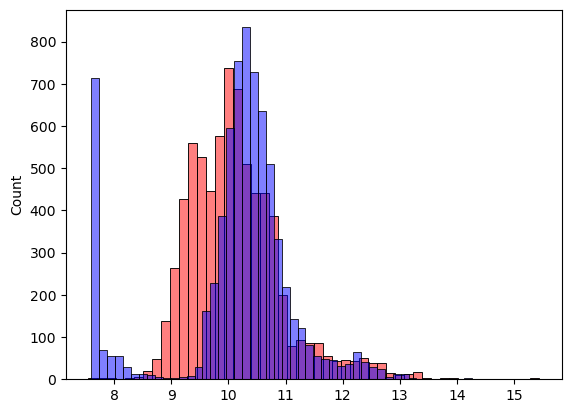

In [60]:
#compare the y_prediction with y_train graph
sns.histplot(y_prediction, color='red', alpha = 0.5,bins=50)
sns.histplot(y_train, color='blue', alpha = 0.5, bins= 50)

# Root Mean Square Error(RMSE)

###### RMSE = sqrt(E(y-actual - y-pred)^2 / m)
###### where y-actual is the actual value
###### y-pred is the predicted value 
##### m is the number of observations

In [61]:
#RMSE function
def rmse(y, y_pred): 
    sqr_error = (y - y_pred) ** 2
    mean_sqr_error = sqr_error.mean()
    
    return np.sqrt(mean_sqr_error)
    

In [62]:
rmse(y_train, y_prediction)

0.7441183825995423

### Validating the model

In [63]:
# write a function to prepare data
def prepare_X(df):
    
    #first extract numerical values
    df_num = df[base]
    
    #fill the null values
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X 

In [64]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.7558149715468393

### Simple Feature Engineering

2017

In [71]:
#returns the age of the cars
# subtract the year column from the last year the data was collected
age = train_df.year.max() - train_df.year
age

0       25
1       12
2       13
3       14
4        1
        ..
7145     5
7146    26
7147    14
7148     3
7149     2
Name: year, Length: 7150, dtype: int64

In [77]:
# add a new column age to the train_df dataframe
def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df
    df = df.copy()
    df['age'] = df.year.max() - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [82]:
X_train = prepare_X(train_df)

W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.5183711764968119

<Axes: ylabel='Count'>

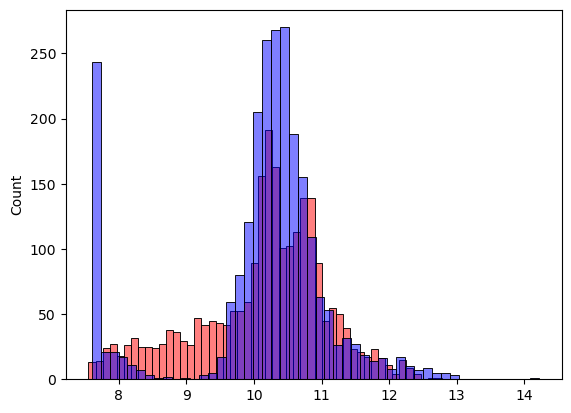

In [83]:
sns.histplot(y_pred, alpha=0.5, color='red', bins=50)
sns.histplot(y_val_df, alpha=0.5, color='blue', bins=50)

### Categorical Variables
##### Turning categorical feature into usable format

In [86]:
train_df.number_of_doors.nunique()

3

In [87]:
train_df.number_of_doors.values

array([2., 2., 4., ..., 3., 3., 2.])

In [88]:
#use for loop to create three new features for the 3 types of columns
for val in [2,3,4]:
    train_df['door_num_%s' %val] = (train_df.number_of_doors == val).astype('int')

In [90]:
train_df.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,door_num_2,door_num_3,door_num_4
0,Chevrolet,S-10 Blazer,1992,regular unleaded,160.0,6.0,MANUAL,rear wheel drive,2.0,NaN,Compact,2dr SUV,22,16,1385,1,0,0
1,Pontiac,Sunfire,2005,regular unleaded,140.0,4.0,MANUAL,front wheel drive,2.0,NaN,Compact,Coupe,32,23,210,1,0,0
2,Chevrolet,Cavalier,2004,regular unleaded,140.0,4.0,MANUAL,front wheel drive,4.0,NaN,Compact,Sedan,33,23,1385,0,0,1
3,Volvo,V40,2003,premium unleaded (required),170.0,4.0,AUTOMATIC,front wheel drive,4.0,Luxury,Compact,Wagon,27,19,870,0,0,1
4,Infiniti,Q50,2016,premium unleaded (required),208.0,4.0,AUTOMATIC,rear wheel drive,4.0,Luxury,Midsize,Sedan,31,23,190,0,0,1


In [95]:
#Prepare the new X_train and the above for loop 

def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df and list
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [2,3,4]:
        df['door_num_%s' %val] = (df.number_of_doors == val).astype('int')
        features.append('door_num_%s' %val)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [97]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.5146313877436582

#### The added new feature didn't improve the model

In [112]:
#Use the make feature if there will be change
df.make.nunique()

48

In [113]:
#choose the top 5 popular cars 
makes = list(df.make.value_counts().head().index)

In [114]:
#loop through the list above to modify the feature and add the new features
def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df and list
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [2,3,4]:
        df['door_num_%s' %val] = (df.number_of_doors == val).astype('int')
        features.append('door_num_%s' %val)
    
    for val in makes:
        df['make_%s' %val] = (df.make == val).astype('int')
        features.append('make_%s' %val)
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [115]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.5082311220945722

In [116]:
#adding the rest of the categorical features
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [118]:
categorical_list = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style',
]

In [124]:
#map the top 5 popular categories for each feature in list

categories={}

for c in categorical_list:
    categories[c] = list(df[c].value_counts().head().index)
    

In [125]:
categories

{'make': ['Chevrolet', 'Ford', 'Volkswagen', 'Toyota', 'Dodge'],
 'engine_fuel_type': ['regular unleaded',
  'premium unleaded (required)',
  'premium unleaded (recommended)',
  'flex-fuel (unleaded/E85)',
  'diesel'],
 'transmission_type': ['AUTOMATIC',
  'MANUAL',
  'AUTOMATED_MANUAL',
  'DIRECT_DRIVE',
  'UNKNOWN'],
 'driven_wheels': ['front wheel drive',
  'rear wheel drive',
  'all wheel drive',
  'four wheel drive'],
 'market_category': ['Crossover',
  'Flex Fuel',
  'Luxury',
  'Luxury,Performance',
  'Hatchback'],
 'vehicle_size': ['Compact', 'Midsize', 'Large'],
 'vehicle_style': ['Sedan',
  '4dr SUV',
  'Coupe',
  'Convertible',
  '4dr Hatchback']}

In [131]:
#now encode the new features and add them to the training matrix
def prepare_X(df):
    
    #first make a copy of the df inorder not to modify the original df and list
    df = df.copy()
    features = base.copy()
    
    df['age'] = df.year.max() - df.year
    features.append('age')
    
    for val in [2,3,4]:
        df['door_num_%s' %val] = (df.number_of_doors == val).astype('int')
        features.append('door_num_%s' %val)
        
    for c, values in categories.items():
        for val in values:
            df['%s_%s' %(c,val)] = (df[c] == val).astype('int')
            features.append('%s_%s' % (c,val))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [132]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression(X_train, y_train)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

223.55018210354854

In [134]:
int(W0)

93996373393462624

array([-9.45089308e-01, -3.17895957e+01, -3.61603895e+01,  1.07629665e+01,
       -8.03251121e-03, -1.11860191e+01, -4.73976601e+03, -4.97683609e+03,
       -4.78444180e+03,  1.93140559e+01,  4.00396320e+01, -7.35967549e+01,
       -8.00481940e+01,  4.94063486e-01, -5.63900498e+02, -5.09754559e+02,
       -6.10635180e+02, -5.98368815e+02, -3.17079835e+02, -1.62510755e+17,
       -1.62510755e+17, -1.62510755e+17, -1.62510755e+17, -1.62510755e+17,
        6.85143814e+16,  6.85143814e+16,  6.85143814e+16,  6.85143814e+16,
       -2.69661410e+02, -2.59545768e+01, -9.27286809e+00, -5.06998990e+00,
        7.75112016e+00, -1.69437892e+02, -8.61370220e+01, -9.31708325e+01,
        2.45267753e-02,  2.99638559e-02,  2.31536498e-01,  3.56285832e-01,
       -1.28189246e-01])

### Regularization
##### Regularization is used to avoid overfitting and underfitting of our model

In [137]:
#introduce new regularization parameter r to the training model 
def train_linear_regression_reg(X, y, r=0.001):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [138]:
X_train = prepare_X(train_df)
W0, W = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(val_df)
y_pred = W0 + X_val.dot(W)

rmse(y_val_df, y_pred)

0.4622506700830034

### when our model is regularized, the output improved significantly

### Tuning the model

In [144]:
#check the model for different r values
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1]:
    X_train = prepare_X(train_df)
    W0, W = train_linear_regression_reg(X_train, y_train, r)

    X_val = prepare_X(val_df)
    y_pred = W0 + X_val.dot(W)

    score = rmse(y_val_df, y_pred).round(2)
    print("For r: "+str(r)+" :score is :"+str(score))
    

For r: 0 :score is :223.55
For r: 1e-06 :score is :0.46
For r: 0.0001 :score is :0.46
For r: 0.001 :score is :0.46
For r: 0.01 :score is :0.46
For r: 0.1 :score is :0.46
For r: 1 :score is :0.46
